# WeatherPy
----

In [ ]:
%matplotlib notebook

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
from config import owm_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
print("Beginning Data Retrieval")
print("-----------------------------")

response = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

try:
    for city in cities:
        print(f"Processing Record {cities.index(city)+1} for {city}")
        target_url = f"{url}appid={owm_api}&q={city}&units=imperial"
        weather = requests.get(target_url).json()
        print(target_url)
        response.append(weather)

except KeyError:
    print("City not found. Skipping...")

In [171]:
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

x=0
for r in response:
    try:     
        cloudiness.append(response[x]["clouds"]["all"])  
        country.append(response[x]["sys"]["country"])
        humidity.append(response[x]["main"]["humidity"])
        lat.append(response[x]["coord"]["lat"])
        lng.append(response[x]["coord"]["lon"])
        max_temp.append(response[x]["main"]["temp_max"])
        wind_speed.append(response[x]["wind"]["speed"])
        x += 1
    except KeyError:     
        cloudiness.append("Not Found")  
        country.append("Not Found")  
        humidity.append("Not Found")  
        lat.append("Not Found")  
        lng.append("Not Found")  
        max_temp.append("Not Found")  
        wind_speed.append("Not Found")  
        x +=1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [172]:
weather_df = pd.DataFrame({"City" : cities,
                           "Country" : country,
                           "Cloudiness (%)" : cloudiness,
                           "Humidity (%)" : humidity,
                           "Max Temp (F)" : max_temp,
                           "Wind Speed (MPH)" : wind_speed ,
                           "Latitude" : lat,
                           "Longitude" : lng
                          })

In [173]:
#Drop null values
weather_df = weather_df.loc[weather_df["Cloudiness (%)"] != "Not Found"]
weather_df.head()

,City,Country,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (MPH),Latitude,Longitude
0,kodiak,US,75,69,39.92,11.41,39.95,-94.76
1,kapaa,US,75,53,75.92,21.92,22.08,-159.32
2,college,US,90,93,21.02,5.41,64.86,-147.8
3,hilo,US,20,57,71.96,12.75,19.71,-155.08
4,mgandu,TZ,36,95,62.37,4.18,-5.96,34.11


In [209]:
weather_df.to_csv("City_Weather.csv")

In [175]:
weather_df["Max Temp (F)"] = weather_df["Max Temp (F)"].astype(float)
weather_df["Latitude"] = weather_df["Latitude"].astype(float)
weather_df["Humidity (%)"] = weather_df["Humidity (%)"].astype(float)
weather_df["Wind Speed (MPH)"] = weather_df["Wind Speed (MPH)"].astype(float)
weather_df["Cloudiness (%)"] = weather_df["Cloudiness (%)"].astype(float)

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


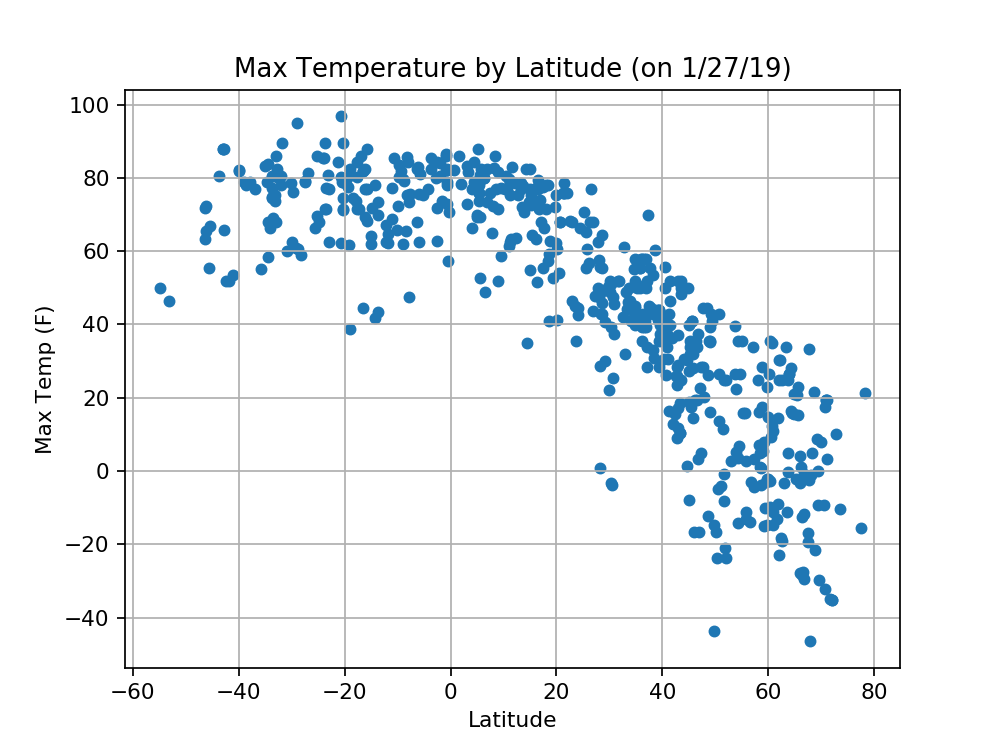

In [176]:
weather_df.plot(kind="scatter", x="Latitude", y="Max Temp (F)", grid=True,
              title="Max Temperature by Latitude (on 1/27/19)")
plt.show()
plt.savefig("TempByLat.png")

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


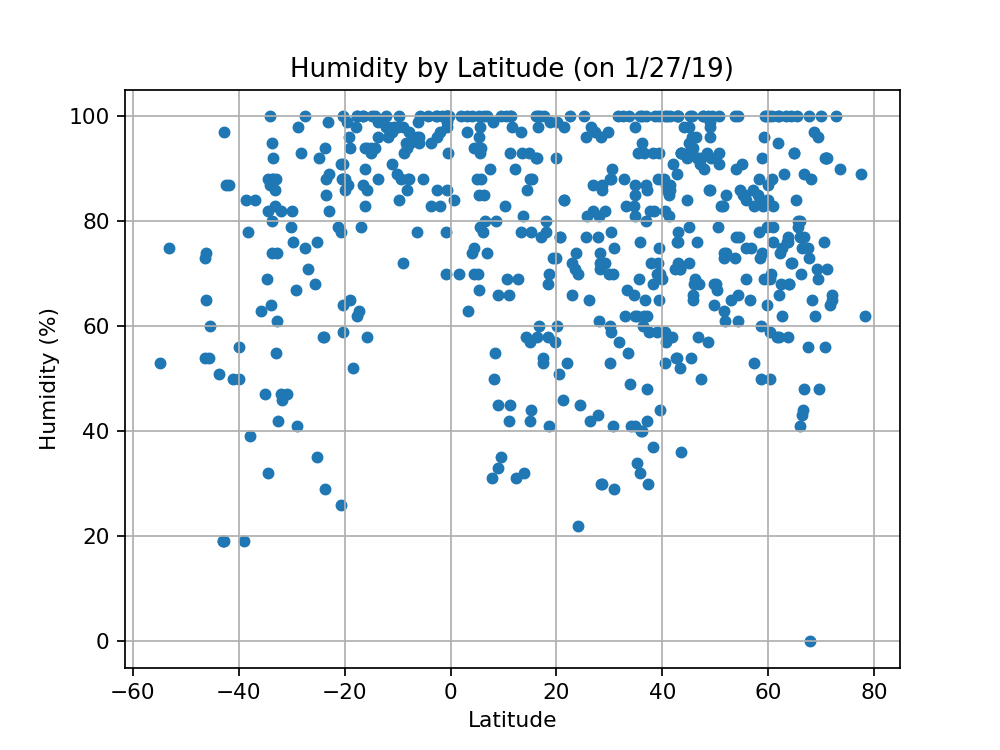

In [177]:
weather_df.plot(kind="scatter", x="Latitude", y="Humidity (%)", grid=True,
              title="Humidity by Latitude (on 1/27/19)")
plt.show()
plt.savefig("HumidityByLat.png")

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


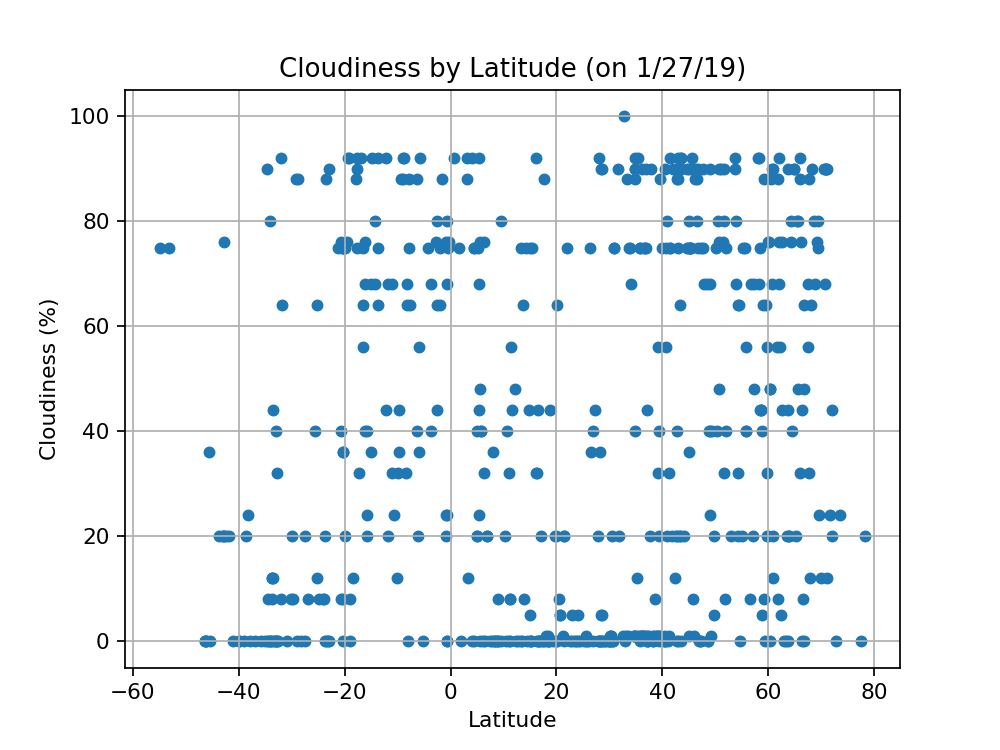

In [178]:
weather_df.plot(kind="scatter", x="Latitude", y="Cloudiness (%)", grid=True,
              title="Cloudiness by Latitude (on 1/27/19)")
plt.show()
plt.savefig("CloudsByLat.png")

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


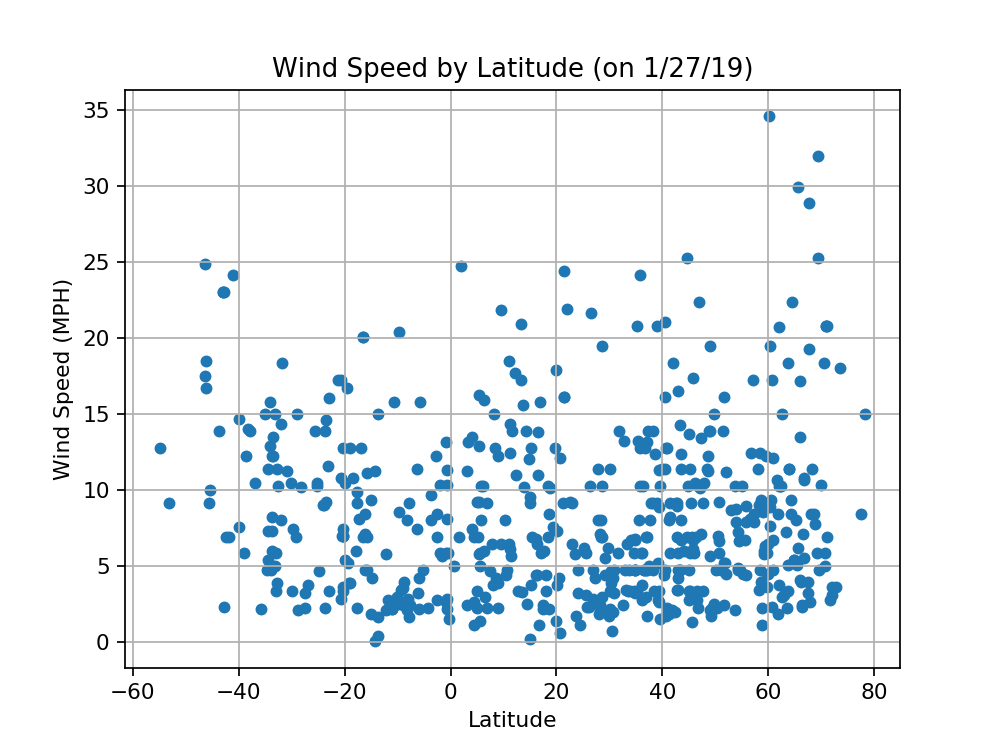

In [179]:
weather_df.plot(kind="scatter", x="Latitude", y="Wind Speed (MPH)", grid=True,
              title="Wind Speed by Latitude (on 1/27/19)")
plt.show()
plt.savefig("WindsByLat.png")

In [191]:
dry = weather_df["Humidity (%)"].min()
driest = weather_df.loc[weather_df["Humidity (%)"] == dry]
driest

,City,Country,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (MPH),Latitude,Longitude
491,batagay-alyta,RU,12.0,0.0,-46.45,2.62,67.8,130.41


In [192]:
cold = weather_df["Max Temp (F)"].min()
coldest = weather_df.loc[weather_df["Max Temp (F)"] == cold]
coldest

,City,Country,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (MPH),Latitude,Longitude
491,batagay-alyta,RU,12.0,0.0,-46.45,2.62,67.8,130.41


In [206]:
humid = weather_df.loc[weather_df["Humidity (%)"] > 50]
very_humid = weather_df.loc[weather_df["Humidity (%)"] > 75]
print(len(humid)/len(weather_df)*100)
print(len(very_humid)/len(weather_df)*100)

89.61937716262976
59.688581314878896


### Analysis

* The weather is very warm in areas close to the equator (plus or minus 20 degrees). Latitudes south of the equator are hot right now, likely due to the tilt of the earth. Latitudes above 20 degrees show a steady decline in temperarture as you get further above the equator.
* There is no strong relationship between latitude and humidity. The vast majority of cities around the world have high humidity tonight. 90% of the cities searched had a humidity rate over 50%, and 60% had humidity rate over 75%.
* Batagay-Alyta, Russia was both the coldest and driest city in my search, at 0% humiduty and a frigid -46 degrees!